In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is zero and no total charges are recorded

In [3]:
# replace blanks with 0
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
# then change the data types
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# checking the null values
df.isnull().sum()
# to check over all null values
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# check duplicate values
df.duplicated().sum()
# check duplicate values using customerID
df["customerID"].duplicated().sum()

np.int64(0)

In [8]:
# function to convert 0 and 1 column values to yes and no values
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
# apply conv function to SeniorCitizen
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

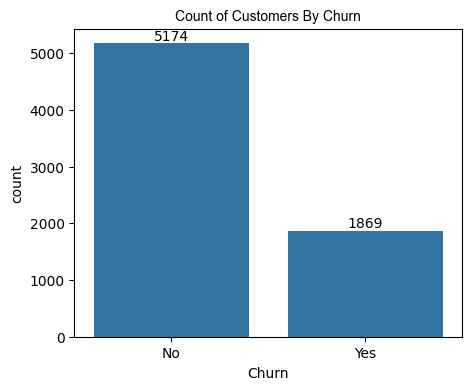

In [9]:
# bar chart
plt.figure(figsize=(5,4))# width and height of chart image
vx = sns.countplot(x = 'Churn' , data = df)
vx.bar_label(vx.containers[0]) # shows the count values on bars of the chart
plt.title("Count of Customers By Churn", font="arial" , fontsize=10 )
plt.show()

       Churn
Churn       
No      5174
Yes     1869


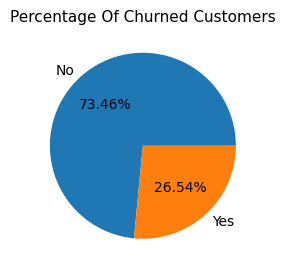

In [10]:
# Count using group by because the datatype of chrun is object
gb = df.groupby("Churn").agg({'Churn':"count"})
print(gb)
#pie chart
plt.figure(figsize=(3,4)) # width and height of chart image
plt.pie(gb["Churn"],labels= gb.index,autopct="%1.2f%%")
plt.title("Percentage Of Churned Customers" , fontsize=11)
plt.show()

# from the abpve shown pie chart we can conclude that 26.54% people were churned out.
# now let's find the reason behind it

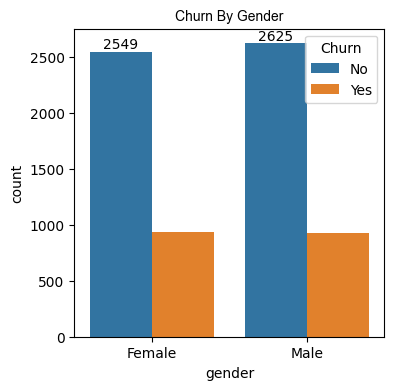

In [11]:
plt.figure(figsize=(4,4))
gx = sns.countplot(x = "gender" , data = df , hue="Churn") 
gx.bar_label(gx.containers[0])
plt.title("Churn By Gender",font="arial")
plt.show()

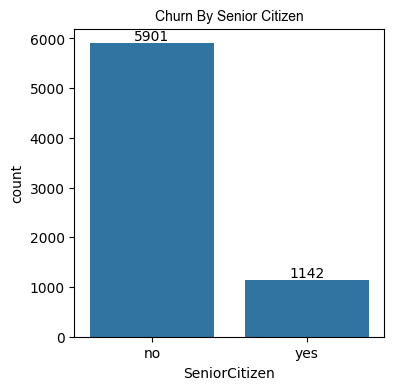

In [12]:
plt.figure(figsize=(4,4))
gx = sns.countplot(x = "SeniorCitizen" , data = df) 
gx.bar_label(gx.containers[0])
plt.title("Churn By Senior Citizen",font="arial")
plt.show()

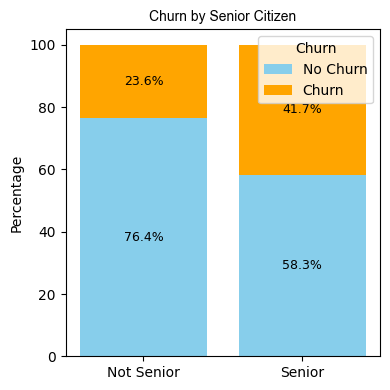

In [13]:
# Prepare data
data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percent = data.div(data.sum(axis=1), axis=0) * 100

# Ensure consistent column order
if 'No' in percent.columns and 'Yes' in percent.columns:
    percent = percent[['No', 'Yes']]

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
bars = ax.bar(
    x=[0, 1],
    height=percent['No'],
    label='No Churn',
    color='skyblue'
)
bars2 = ax.bar(
    x=[0, 1],
    height=percent['Yes'],
    bottom=percent['No'],
    label='Churn',
    color='orange'
)

# Add percentage labels
for i in range(len(percent)):
    ax.text(i, percent['No'].iloc[i]/2, f"{percent['No'].iloc[i]:.1f}%", ha='center', va='center', fontsize=9)
    ax.text(i, percent['No'].iloc[i] + percent['Yes'].iloc[i]/2, f"{percent['Yes'].iloc[i]:.1f}%", ha='center', va='center', fontsize=9)

# Customize
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Senior', 'Senior'])
ax.set_ylabel("Percentage")
ax.set_title("Churn by Senior Citizen", font="Arial")
ax.legend(title="Churn")
plt.tight_layout()
plt.show()

# Comaparative a great percentage of people in senior citizen category have churned

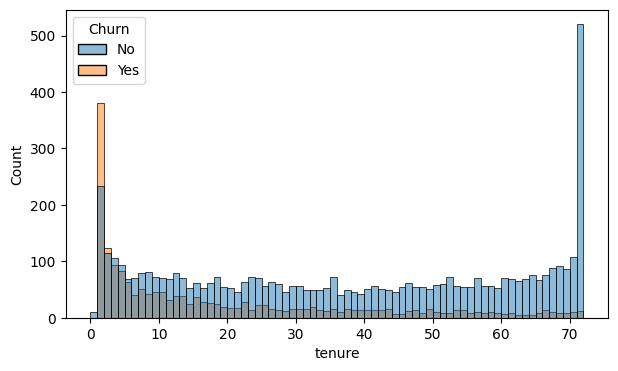

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(x = "tenure" , data = df, bins = 72,hue="Churn")
plt.show()

# people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

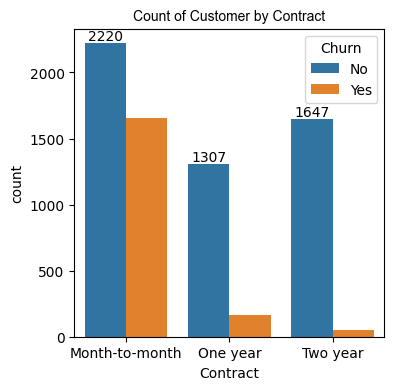

In [15]:
plt.figure(figsize=(4,4))
gx = sns.countplot(x = "Contract" , data = df,hue="Churn") 
gx.bar_label(gx.containers[0])
plt.title("Count of Customer by Contract",font="arial")
plt.show()

# people who has month-to-month contract are likely to churn then from those who have 1 or 2 year of contract 

In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

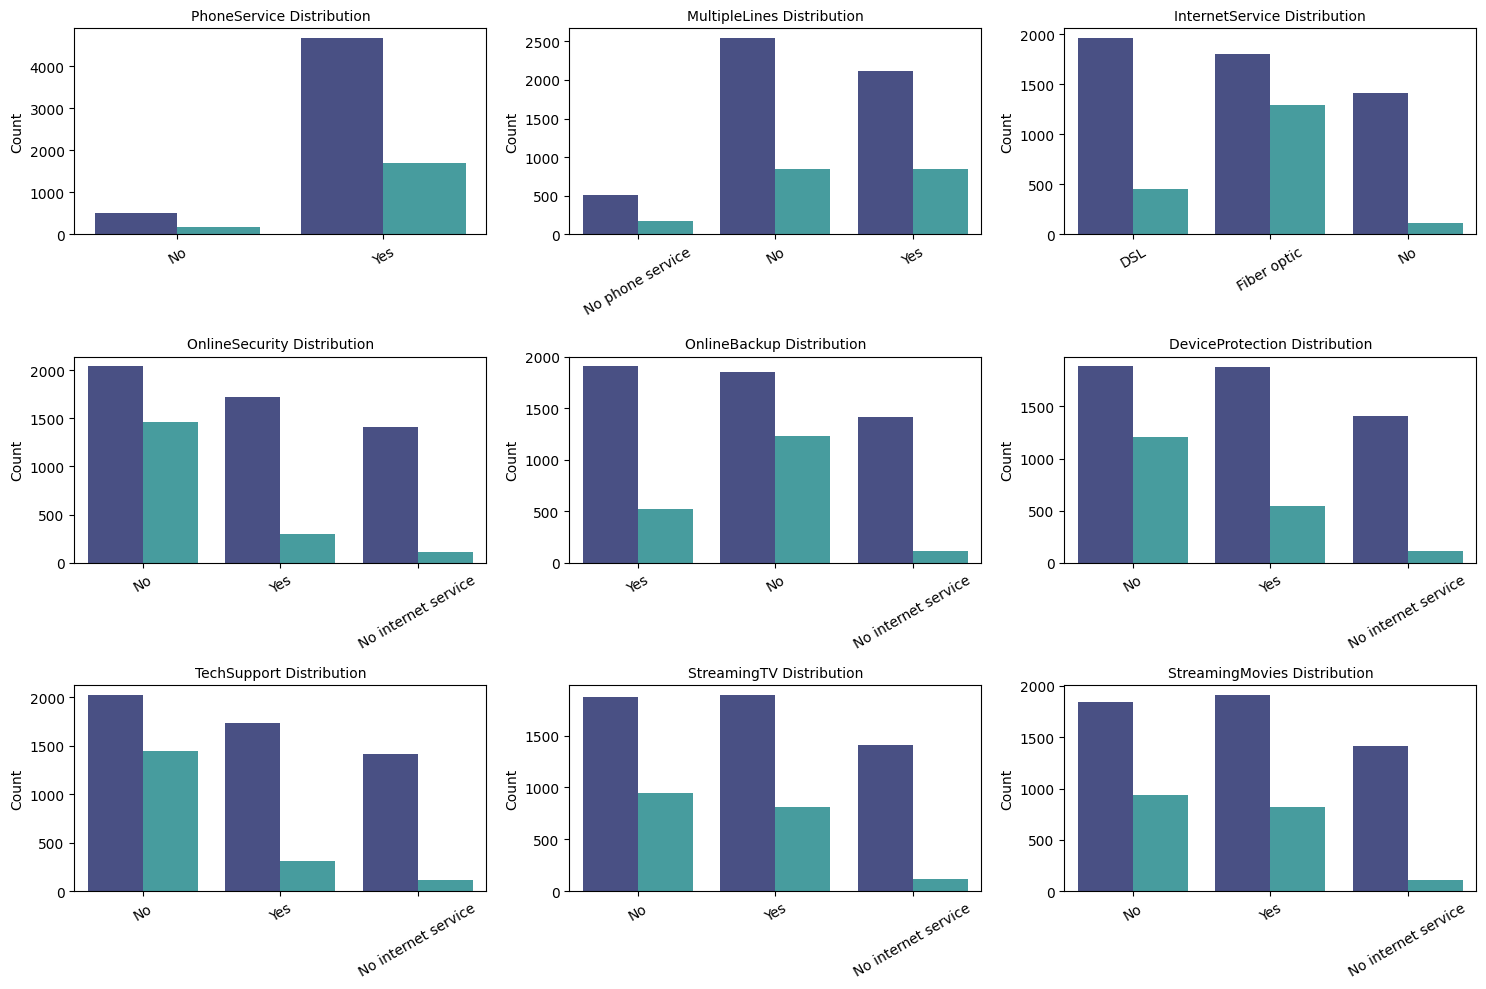

In [17]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

rows = 3
cols_per_row = 3

plt.figure(figsize=(15, 10))

for idx, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, idx)
    sns.countplot(x=col, hue="Churn", data=df, palette='mako', legend=False)
    plt.title(f"{col} Distribution", fontsize=10)
    plt.xticks(rotation=30)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

The multi-panel count plots reveal distinct usage trends across service types:

* **PhoneService**: Majority of customers have phone service.
* **MultipleLines**: “No” is most common, followed by “Yes,” with a smaller share having no phone service.
* **InternetService**: DSL and Fiber Optic are dominant, with a smaller “No” category.
* **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**: In each case, “No” slightly outweighs “Yes,” and “No internet service” forms a small segment.
* **StreamingTV & StreamingMovies**: Slightly more customers say “No” than “Yes,” with “No internet service” as a minor share.

Overall, the data signals **high core service adoption** (phone/internet) but **lower uptake for add-on services** like security, backup, and streaming.


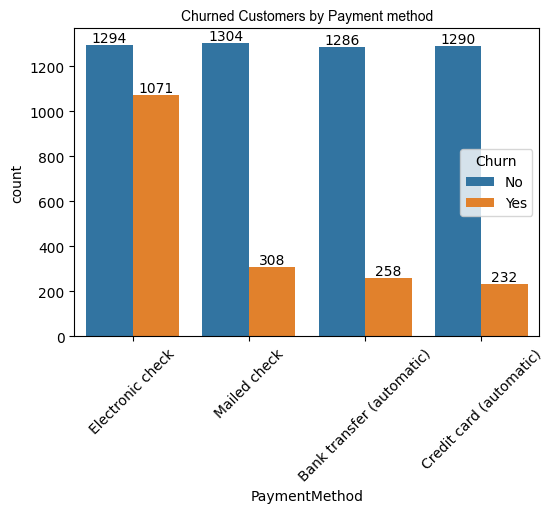

In [18]:
plt.figure(figsize=(6,4))
gx = sns.countplot(x = "PaymentMethod" , data = df,hue="Churn") 
gx.bar_label(gx.containers[0])
gx.bar_label(gx.containers[1])
plt.title("Churned Customers by Payment method",font="arial")
plt.xticks(rotation = 45)
plt.show()

# Customers are likely to churn when he is using elctronic check as a payment method